In [47]:
import re
from pathlib import Path
from typing import List

import numpy as np
import matplotlib.pyplot as plt

from kedro.extras.datasets.pickle import PickleDataSet
from kedro.config import ConfigLoader

from PIL import Image

import kornia.augmentation as K

import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.utils import save_image

In [4]:
import os, sys
sys.path.append(os.path.abspath('../src/'))

from tagseg.data.acdc_dataset import AcdcDataSet

In [5]:
dataset = AcdcDataSet(filepath='../data/03_primary/acdc_train.pt').load()

In [40]:
proba = 1.

augmentations = [
    K.RandomHorizontalFlip(p=proba),
    K.RandomVerticalFlip(p=proba),
    K.RandomElasticTransform(p=proba),
    K.RandomGaussianNoise(p=proba),
    K.RandomSharpness(p=proba),
    K.RandomGaussianBlur(kernel_size=(7, 7), sigma=(3., 3.), p=proba)
]

augmentations = [K.AugmentationSequential(aug, data_keys=["input", "mask"]) for aug in augmentations]

In [54]:
def camel_to_words(name: str) -> str:
  name = re.sub('(.)([A-Z][a-z]+)', r'\1 \2', name)
  return re.sub('([a-z0-9])([A-Z])', r'\1 \2', name)

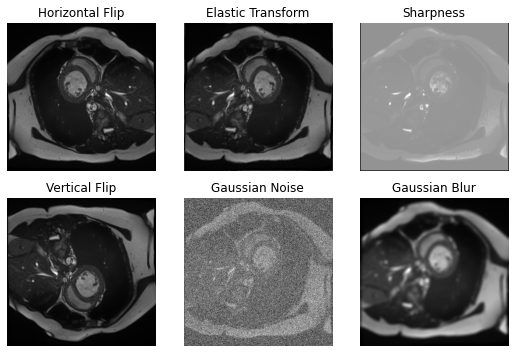

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(7.5, 5))

for i, aug in enumerate(augmentations):

    m, n = i % 2, i // 2

    im, la = aug(*dataset[1503])

    ax[m, n].imshow(im[0, 0], cmap='gray')  # , vmin=None, vmax=1.)
    ax[m, n]
    ax[m, n].axis('off')
    ax[m, n].set_title(' '.join(map(lambda s: s.capitalize(), camel_to_snake(aug[0].__class__.__name__).split(' ')[1:])))

plt.tight_layout()
plt.show()